<a href="https://colab.research.google.com/github/BrunoMaia23/Am/blob/main/Teste_MVP01_PUC_RJ_Previs%C3%A3o_de_Poss%C3%ADveis_Campe%C3%B5es_da_Copa_do_Mundo_com_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema:

Objetivo: O problema a ser resolvido é prever as seleções com maiores chances de vencer a Copa do Mundo de 2026,
baseando-se em dados históricos de jogos anteriores e rankings FIFA. Este é um problema de **aprendizado supervisionado**,
pois temos dados de partidas anteriores e queremos prever a seleção vencedora com base nesses dados.
Premissas: Supomos que os dados históricos (resultados de jogos e rankings) são bons preditores do desempenho futuro das seleções.
Restrição: O uso dos dados é limitado ao histórico de Copas do Mundo e rankings FIFA.
Atributos do dataset:
- 'Home Team Name' e 'Away Team Name': Seleções participantes.
- 'Home Team Goals' e 'Away Team Goals': Gols marcados pelas seleções.
- 'Winner': Time vencedor ou empate.



Primeiras linhas do dataset:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0             

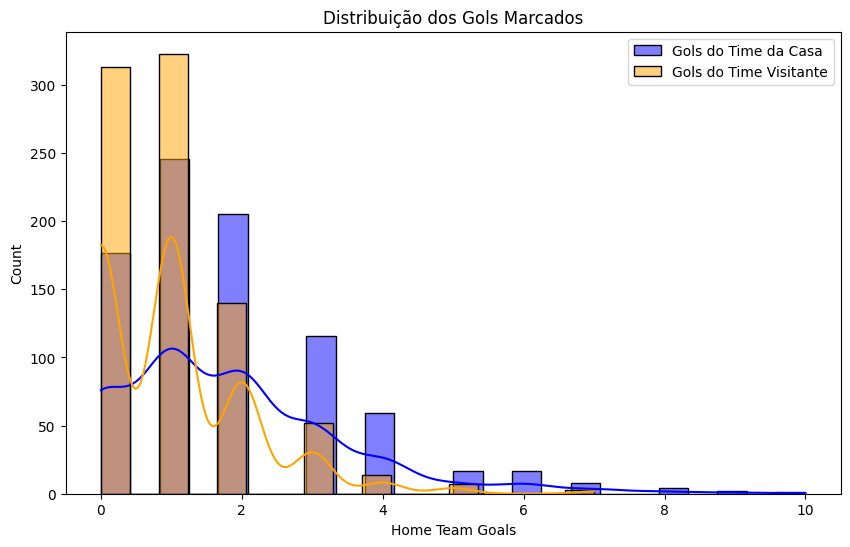

In [18]:
# Análise de Dados
# Importação de bibliotecas e carregamento de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Carregar o dataset (ajustar URL se necessário)
url = 'https://raw.githubusercontent.com/BrunoMaia23/Am/refs/heads/main/WorldCupMatches.csv'
df = pd.read_csv(url)

# Verificar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())

# Quantidade de atributos e instâncias
print(f"\nNúmero de atributos: {df.shape[1]}")
print(f"Número de instâncias: {df.shape[0]}")

# Tipos de dados dos atributos
print("\nTipos de dados dos atributos:")
print(df.dtypes)

# Verificar valores faltantes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())

# Estatísticas descritivas para atributos numéricos
print("\nResumo estatístico dos atributos numéricos:")
print(df.describe())

# Visualização da distribuição dos gols
plt.figure(figsize=(10, 6))
sns.histplot(df['Home Team Goals'], kde=True, color='blue', label='Gols do Time da Casa')
sns.histplot(df['Away Team Goals'], kde=True, color='orange', label='Gols do Time Visitante')
plt.title('Distribuição dos Gols Marcados')
plt.legend()
plt.show()


In [19]:
# Pré-processamento de dados
# Tratar valores faltantes: Substituímos valores faltantes por 0 nos atributos de gols
df['Home Team Goals'] = df['Home Team Goals'].fillna(0)
df['Away Team Goals'] = df['Away Team Goals'].fillna(0)

# Codificação das variáveis categóricas
label_encoder_home = LabelEncoder()
label_encoder_away = LabelEncoder()
df['Home Team Name Encoded'] = label_encoder_home.fit_transform(df['Home Team Name'])
df['Away Team Name Encoded'] = label_encoder_away.fit_transform(df['Away Team Name'])

# Normalização dos atributos numéricos (gols)
scaler = StandardScaler()
df[['Home Team Goals', 'Away Team Goals']] = scaler.fit_transform(df[['Home Team Goals', 'Away Team Goals']])

# Verificar as primeiras linhas após o pré-processamento
print("\nPrimeiras linhas após o pré-processamento:")
print(df.head())



Primeiras linhas após o pré-processamento:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France         3.699821         1.315555         Mexico   
1            USA         2.689634        -0.309605        Belgium   
2     Yugoslavia         1.679447         1.315555         Brazil   
3        Romania         2.689634         1.315555           Peru   
4      Argentina         0.669260        -0.309605         France   

  Win conditions  ...  Half-time Away Goals                 Referee  \
0                 ...          


Relatório de Classificação do Random Forest:
              precision    recall  f1-score   support

       team1       1.00      1.00      1.00       107
       team2       1.00      1.00      1.00       808

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915



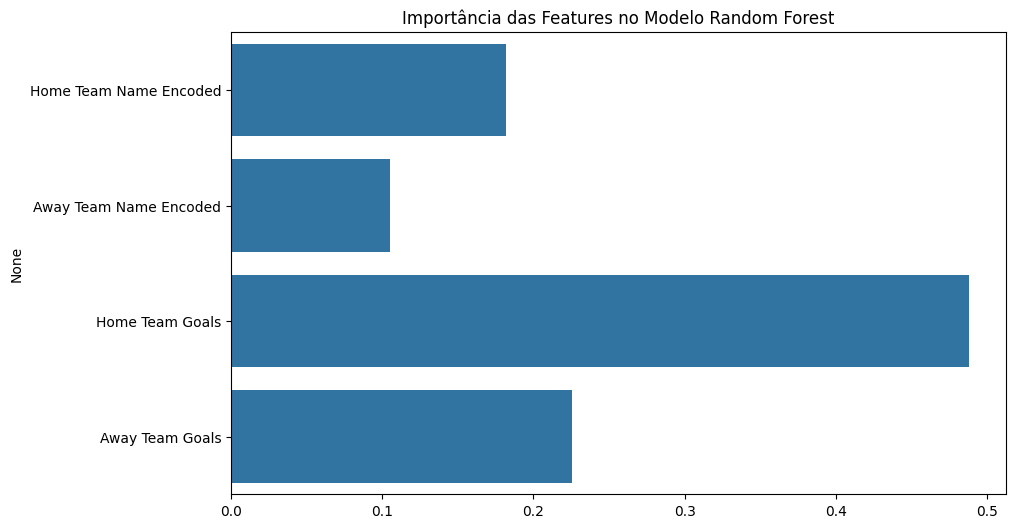

In [20]:
#Treinamento do Modelo
# Definição das variáveis independentes (X) e dependentes (y)
X = df[['Home Team Name Encoded', 'Away Team Name Encoded', 'Home Team Goals', 'Away Team Goals']]
y = df.apply(lambda row: 'team1' if row['Home Team Goals'] > row['Away Team Goals']
             else 'team2' if row['Home Team Goals'] < row['Away Team Goals']
             else 'draw', axis=1)

# Separar dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Avaliação do modelo no conjunto de teste
y_pred = rf_model.predict(X_test)
print("\nRelatório de Classificação do Random Forest:")
print(classification_report(y_test, y_pred))

# Visualização da importância das features
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title('Importância das Features no Modelo Random Forest')
plt.show()



Top 5 seleções com maiores chances de serem campeãs:
Spain        8.0
England      7.5
USA          6.9
Argentina    6.8
Uruguay      6.7
Name: proportion, dtype: float64


<ipython-input-21-697306da8f47>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilidades_campeoes.index, y=probabilidades_campeoes.values, palette='coolwarm')


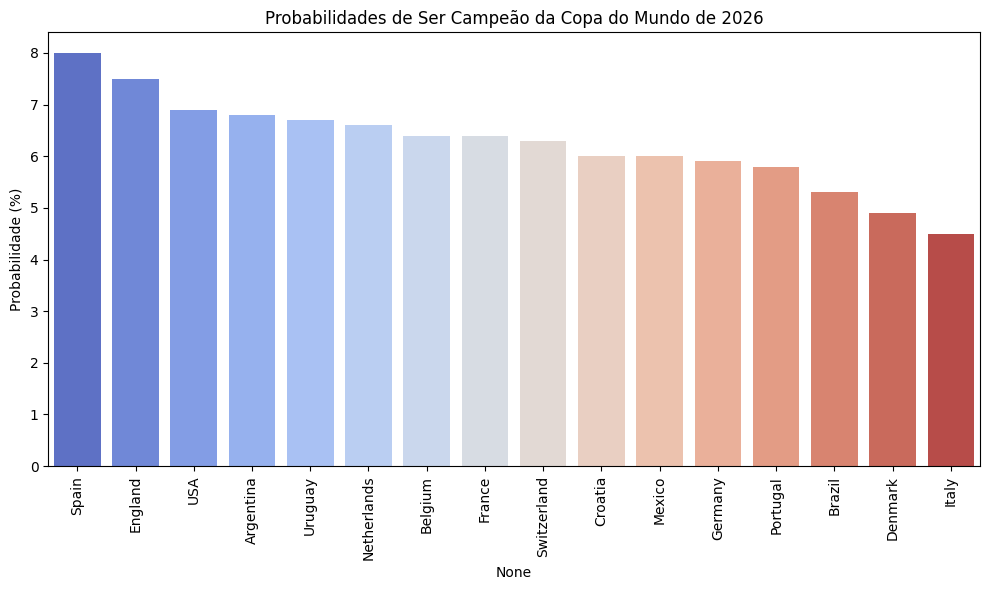

In [21]:
# Função para simular uma partida entre dois times
def simular_partida(time1, time2):
    # Codificar os times
    time1_encoded = label_encoder_home.transform([time1])[0]
    time2_encoded = label_encoder_away.transform([time2])[0]

    # Criar um DataFrame com os dados da partida
    dados_partida = pd.DataFrame({
        'Home Team Name Encoded': [time1_encoded],
        'Away Team Name Encoded': [time2_encoded],
        'Home Team Goals': [0],  # Valores fictícios ou zeros
        'Away Team Goals': [0]
    })

    # Fazer a previsão de quem ganha a partida
    resultado = rf_model.predict(dados_partida)

    return resultado[0]

# Função para simular o torneio completo até definir o campeão
def simular_torneio(selecoes, num_simulacoes=1000):
    resultados = []

    for simulacao in range(num_simulacoes):
        selecoes_restantes = selecoes.copy()

        while len(selecoes_restantes) > 1:
            np.random.shuffle(selecoes_restantes)
            nova_fase = []

            # Emparelhar seleções para as partidas
            for i in range(0, len(selecoes_restantes), 2):
                if i+1 < len(selecoes_restantes):
                    time1 = selecoes_restantes[i]
                    time2 = selecoes_restantes[i+1]

                    # Simular a partida
                    vencedor = simular_partida(time1, time2)

                    # Adicionar o vencedor à próxima fase
                    if vencedor == 'team1':
                        nova_fase.append(time1)
                    elif vencedor == 'team2':
                        nova_fase.append(time2)
                    else:
                        # Caso de empate, escolher vencedor aleatório (ou com base em critérios)
                        vencedor_empate = np.random.choice([time1, time2])
                        nova_fase.append(vencedor_empate)

            selecoes_restantes = nova_fase  # Avançar os vencedores para a próxima fase

        # Adicionar o campeão da simulação
        resultados.append(selecoes_restantes[0])

    # Contagem de quantas vezes cada seleção ganhou o torneio
    campeoes_contagem = pd.Series(resultados).value_counts(normalize=True) * 100

    return campeoes_contagem

# Lista de seleções participantes da Copa do Mundo
selecoes_participantes = ['Brazil', 'Argentina', 'France', 'Germany', 'Spain', 'England',
                          'Belgium', 'Netherlands', 'Portugal', 'Italy', 'Uruguay',
                          'Denmark', 'Switzerland', 'Croatia', 'Mexico', 'USA']

# Simular o torneio 1000 vezes e gerar probabilidades
probabilidades_campeoes = simular_torneio(selecoes_participantes, num_simulacoes=1000)

# Exibir o Top 5 campeões simulados
print("\nTop 5 seleções com maiores chances de serem campeãs:")
print(probabilidades_campeoes.head())

# Gráfico das probabilidades de campeões
plt.figure(figsize=(10, 6))
sns.barplot(x=probabilidades_campeoes.index, y=probabilidades_campeoes.values, palette='coolwarm')
plt.title('Probabilidades de Ser Campeão da Copa do Mundo de 2026')
plt.ylabel('Probabilidade (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
